In [1]:
from __future__ import print_function
import time
import pandas as pd
import numpy as np
from pandas import read_csv

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Engine Mapping Fitting - Fig. 5

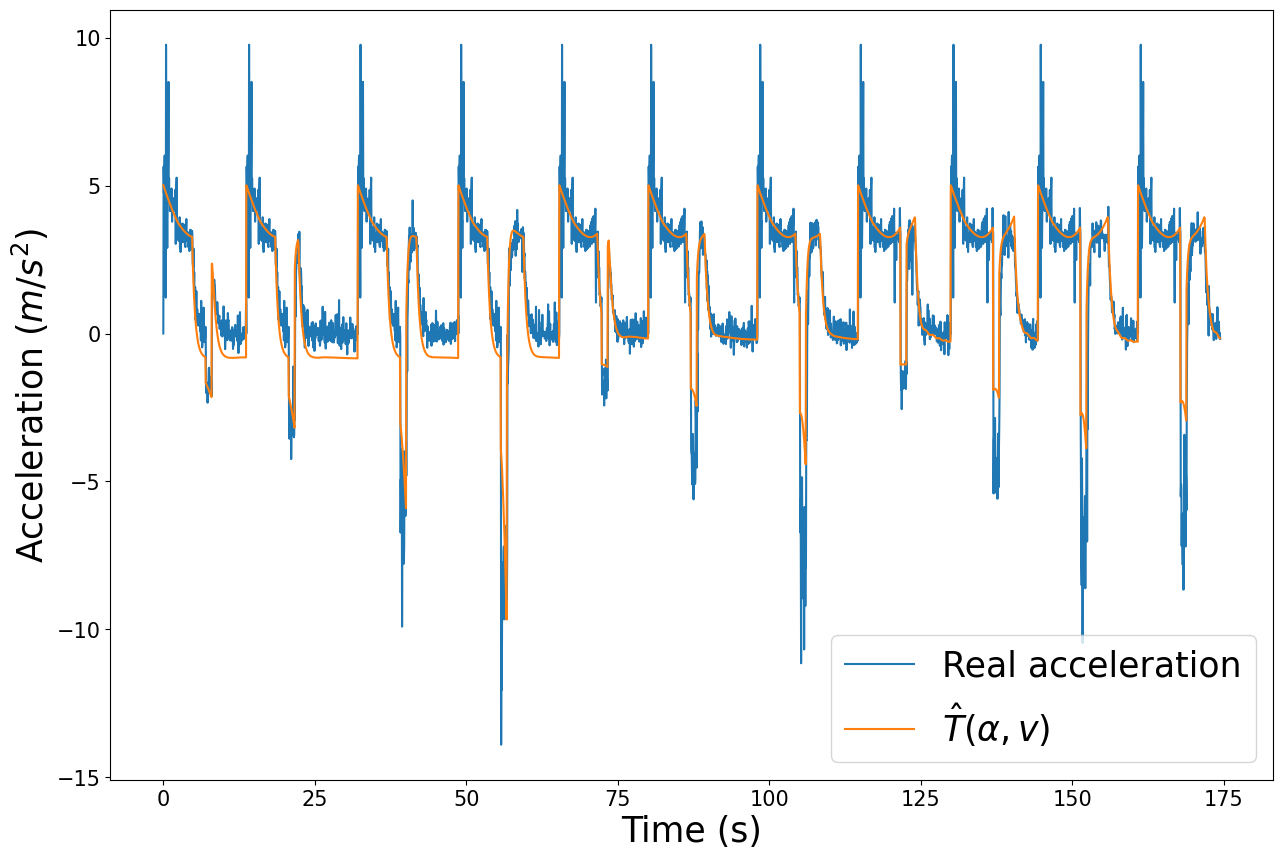

In [2]:
train_data = np.genfromtxt('CCTA25_Fig5_trainacc.csv', delimiter=',')

vel = train_data[:,4]
throttle = train_data[:,6]
braking = train_data[:,8]
acc = train_data[:,5]

alphat = throttle - braking

feature = np.column_stack((np.ones_like(vel), vel, vel**2, alphat, vel*alphat, vel**2 * alphat, vel**3 * alphat))

F = np.array([0.00000000e+00, 1.23546900e+00, -2.39238426e-02,  2.15863500e+01,
 -1.34372610e+00,  2.17613620e-02,  1.59919731e-04])
bias = -16.576565271233825

tt = np.arange(0,acc.shape[0] * 0.05, 0.05)

syn_acc = feature @ F + bias

plt.figure(figsize=(15,10))
plt.plot(tt,acc, label='Real acceleration')
plt.plot(tt,syn_acc, label=r'$\hat{T}(\alpha,v)$')
plt.xlabel('Time (s)',fontsize=25)
plt.ylabel(r'Acceleration ($m/s^2$)',fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Straight Scenario - Fig. 7

## Fig.7(a) - Accelerations

In [3]:
dcp = read_csv(f'CCTA25_Fig7a_atotal.csv', header=None)
atotal = dcp.values
print(atotal.shape)

(2453, 3)


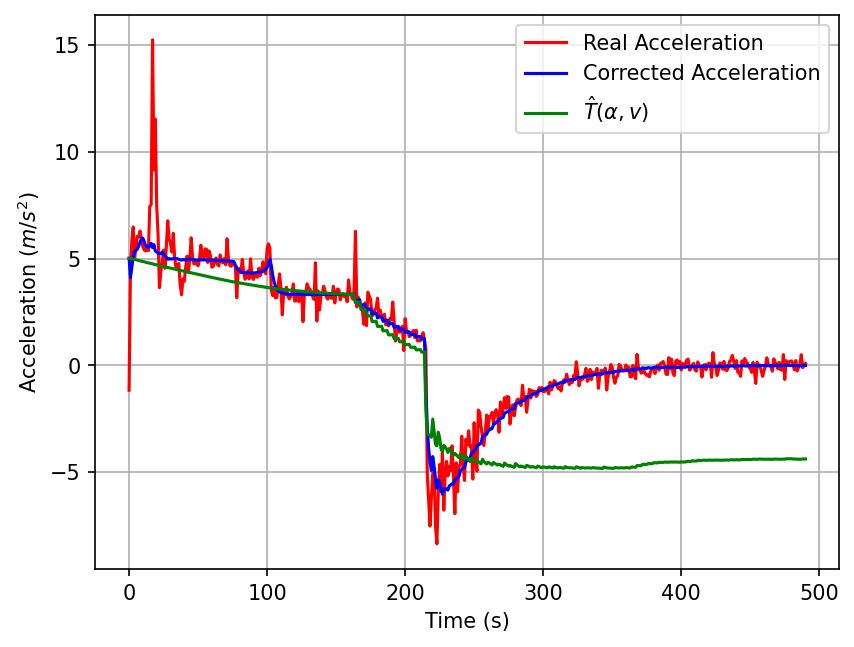

In [4]:
plt.figure(dpi=150)
dt = 5
plt.plot(atotal[::dt,0],'r',label='Real Acceleration')
plt.plot(atotal[::dt,1],'b',label='Corrected Acceleration')
plt.plot(atotal[::dt,2],'g',label=r'$\hat{T}(\alpha,v)$')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel(r'Acceleration ($m/s^2$)')
# plt.title('2D Scatter Plot of Points')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.tight_layout

# Show the plot
plt.show()

## Fig. 7(b) - CBF values for $(\rho_\alpha, \rho_\chi) = (1,500)$

In [5]:
dcp = read_csv(f'CCTA25_Fig7b_adob.csv', header=None)
adob = dcp.values

dcp = read_csv(f'CCTA25_Fig7b_andob.csv', header=None)
andob = dcp.values

length = np.min((andob.shape[0], adob.shape[0]))
andob = andob[:length,:]
adob = adob[:length,:]

t = np.linspace(0,1/200*(length-1),length)


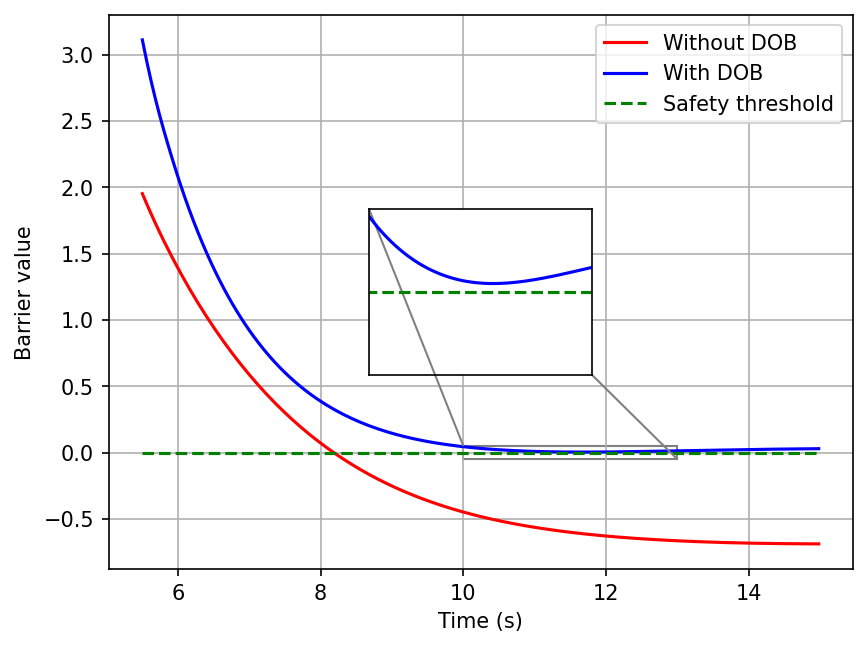

In [6]:

dt = 12
idx_start = 1100

fig, ax = plt.subplots(dpi=150)
ax.plot(t[idx_start::dt],andob[idx_start::dt] - 1,'r',label='Without DOB', linewidth=1.5)
ax.plot(t[idx_start::dt],adob[idx_start::dt] - 1,'b',label='With DOB', linewidth=1.5)
ax.plot(t[idx_start::dt], np.zeros(andob[idx_start::dt].shape[0]),'g',label='Safety threshold',linestyle='--',linewidth=1.5)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Barrier value')
# plt.title('2D Scatter Plot of Points')

# Add grid and legend
ax.grid(True)
ax.legend()

dtt = 12
ff = adob[idx_start::dtt] - 1
axins = inset_axes(ax, width="30%", height="30%", loc='center')
axins.plot(t[idx_start::dtt], ff,'b',label='With DOB', linewidth=1.5)
axins.plot(t[idx_start::dtt], np.zeros(andob[idx_start::dtt].shape[0]),'g',label='Safety threshold',linestyle='--',linewidth=1.5)

x1, x2 = 10, 13
y1, y2 = -0.05, 0.05
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])
axins.grid(True)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout
# Show the plot
plt.show()

## Fig. 7(c) - CBF values for $(\rho_\alpha, \rho_\chi) = (1,1)$

In [7]:
dcp = read_csv('CCTA25_Fig7c_alpha_list.csv', header=None)
alpha_list = dcp.values


dcp = read_csv('CCTA25_Fig7c_beta_list.csv', header=None)
beta_list = dcp.values


dcp = read_csv('CCTA25_Fig7c_hvalue_list.csv', header=None)
hvalue_list = dcp.values


hhvalue_list = hvalue_list[np.isin(hvalue_list[:, 0], alpha_list[:, 0])]



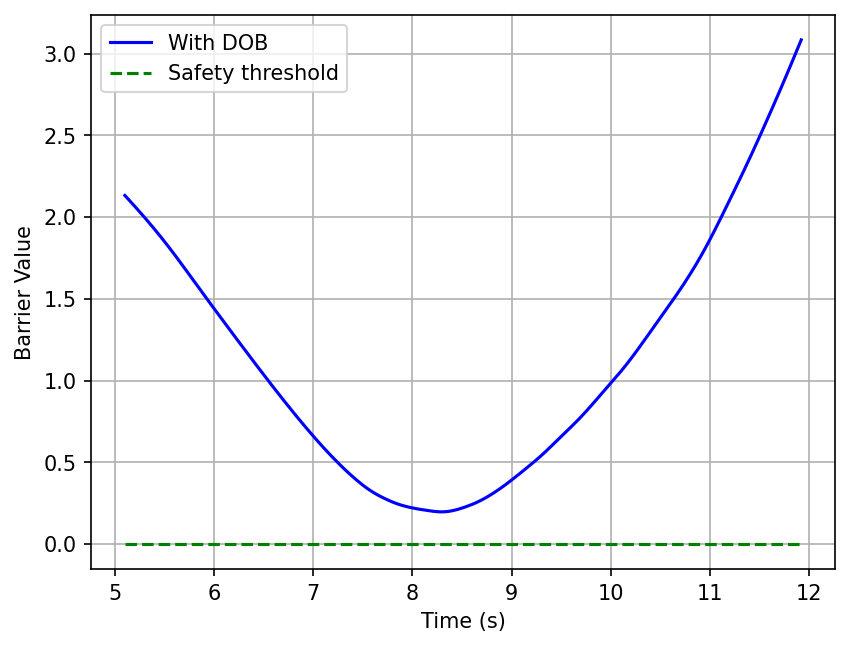

In [8]:
plt.figure(dpi=150)
dt = 1
idx_strt = 255
idx_end = -100

idx_strt1 = 255
idx_end1 = idx_strt1 + hhvalue_list[idx_strt:idx_end,0].shape[0]
plt.plot(hhvalue_list[idx_strt:idx_end,0], (hhvalue_list[idx_strt:idx_end,1]) - 1,
         'b',linewidth=1.5, label='With DOB')

plt.plot(hhvalue_list[idx_strt:idx_end,0], np.zeros(hhvalue_list[idx_strt:idx_end,0].shape[0]),
         'g',label='Safety threshold',linestyle='--',linewidth=1.5)


# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Barrier Value')
# plt.title('2D Scatter Plot of Points')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.tight_layout

# Show the plot
plt.show()

# Complex Scenario - Fig. 8

 ## Extract driver's input, DC output, and CBF output

In [31]:
dcp = read_csv('CCTA25_Fig8_alpha_list.csv', header=None)
alpha_list = dcp.values

dcp = read_csv('CCTA25_Fig8_beta_list.csv', header=None)
beta_list = dcp.values

dcp = read_csv('CCTA25_Fig8_hvalue_list.csv', header=None)
hvalue_list = dcp.values

dcp = read_csv('CCTA25_Fig8_warninglist.csv', header=None)
warninglist = dcp.values

hhvalue_list = hvalue_list[np.isin(hvalue_list[:, 0], alpha_list[:, 0])]

 ## Plot $\alpha$, $\beta$, CBF values, and warning signals

In [32]:
# hhvalue_list[:,0]
for i in range(hhvalue_list[:,0].shape[0] - 1):
    if hhvalue_list[i+1,0] - hhvalue_list[i,0] > 0.03:
        idx_inter = i + 1
        print(f'i={i}, time_pre = {hhvalue_list[i,0]}, time_after = {hhvalue_list[i+1,0]}')

i=223, time_pre = 21.28, time_after = 22.92


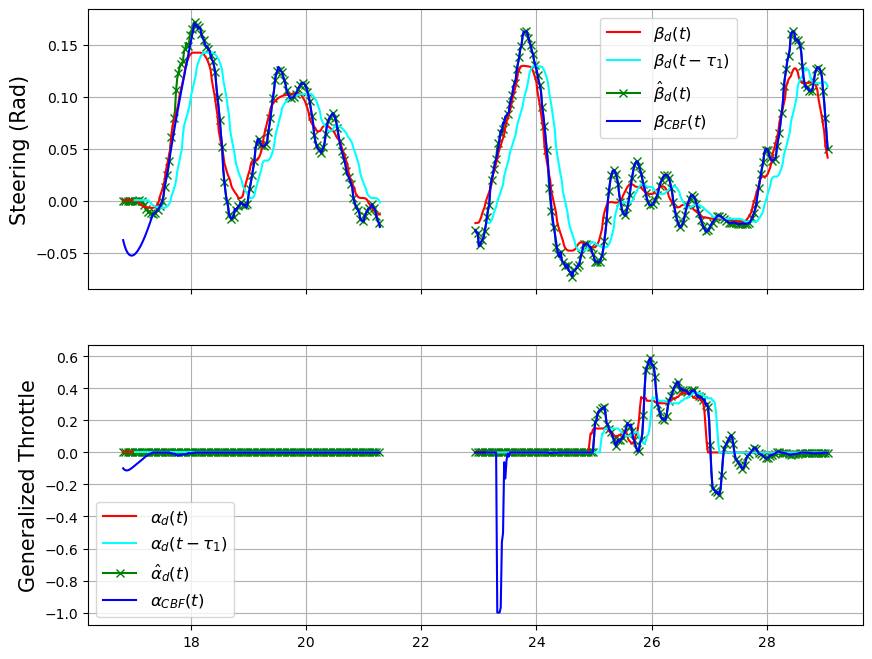

In [33]:
td = 10 # delay
t_hstart = hhvalue_list[0,0]
t_hend = hhvalue_list[-1,0]
idx_hstart = np.where(hvalue_list[:,0] == t_hstart)[0][0]
idx_hend = np.where(hvalue_list[:,0] == t_hend)[0][0]
ttt = hvalue_list[idx_hstart:idx_hend+1,0]

legend_order = [1,2,0,3]
# Create subplots with shared x-axis
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot data
ax[0].plot(beta_list[:idx_inter,0], beta_list[:idx_inter,2] ,'g', marker='x',markevery=2)
ax[0].plot(beta_list[:idx_inter,0], beta_list[:idx_inter,1] ,'r')
ax[0].plot(beta_list[td:idx_inter,0], beta_list[:idx_inter-td,1] ,color=(0,1,1))
ax[0].plot(beta_list[:idx_inter,0], beta_list[:idx_inter,3] ,'b')

ax[0].plot(beta_list[idx_inter+1:,0], beta_list[idx_inter+1:,2] ,'g',label=r'$\hat{\beta}_d(t)$', marker='x',markevery=2)
ax[0].plot(beta_list[idx_inter+1:,0], beta_list[idx_inter+1:,1] ,'r',label=r'$\beta_d(t)$')
ax[0].plot(beta_list[td+idx_inter+1:,0], beta_list[idx_inter+1:-td,1] ,color=(0,1,1),label=r'$\beta_d(t-\tau_1)$')
ax[0].plot(beta_list[idx_inter+1:,0], beta_list[idx_inter+1:,3] ,'b',label=r'$\beta_{CBF}(t)$')


# ax[0].legend(loc='best')
ax[0].legend(bbox_to_anchor=(0.65, 1),loc='upper left',fontsize=12)
ax[0].set_ylabel("Steering (Rad)",fontsize=15)
ax[0].grid()

ax[1].plot(alpha_list[:idx_inter,0], alpha_list[:idx_inter,2] ,'g', marker='x',markevery=2)
ax[1].plot(alpha_list[:idx_inter,0], alpha_list[:idx_inter,1] ,'r')
ax[1].plot(alpha_list[td:idx_inter,0], alpha_list[:idx_inter-td,1] ,color=(0,1,1))
ax[1].plot(alpha_list[:idx_inter,0], alpha_list[:idx_inter,3] ,'b',)

ax[1].plot(alpha_list[idx_inter+1:,0], alpha_list[idx_inter+1:,2] ,'g',label=r'$\hat{\alpha}_d(t)$', marker='x',markevery=2)
ax[1].plot(alpha_list[idx_inter+1:,0], alpha_list[idx_inter+1:,1] ,'r',label=r'$\alpha_d(t)$')
ax[1].plot(alpha_list[td+idx_inter+1:,0], alpha_list[idx_inter+1:-td,1] ,color=(0,1,1),label=r'$\alpha_d(t-\tau_1)$')
ax[1].plot(alpha_list[idx_inter+1:,0], alpha_list[idx_inter+1:,3] ,'b',label=r'$\alpha_{CBF}(t)$')

# ax[1].legend(bbox_to_anchr=(0.65, 1),loc='upper left')
# ax[1].legend(loc='best',fontsize=12)
ax[1].set_ylabel("Generalized Throttle",fontsize=15)
ax[1].grid()

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend([handles[i] for i in legend_order], [labels[i] for i in legend_order],
             bbox_to_anchor=(0.65, 1),loc='upper left',fontsize=12)
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend([handles[i] for i in legend_order], [labels[i] for i in legend_order],
             loc='best',fontsize=12)




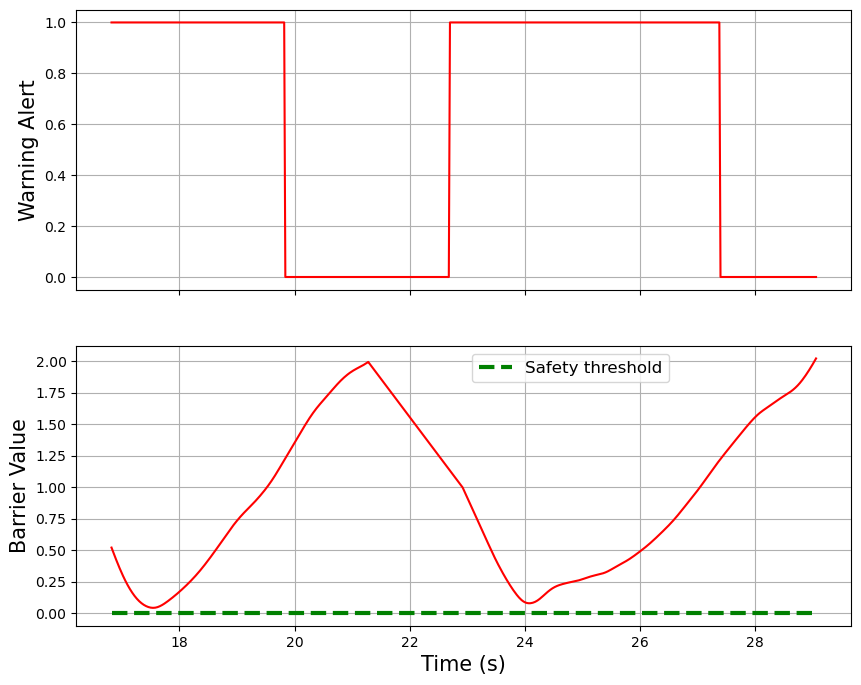

In [34]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(ttt, warninglist ,'r')
# ax[2].plot(hhvalue_list[:,0], np.zeros(hhvalue_list[:,0].shape[0]),'g',label='Safety threshold',linestyle='--',linewidth=3)
ax[0].set_ylabel("Warning Alert",fontsize=15)
# ax[2].set_xlabel("Time (s)")
# ax[2].legend(bbox_to_anchor=(0.65, 1),loc='upper left')
ax[0].grid()


ax[1].plot(hhvalue_list[:,0], np.sqrt(hhvalue_list[:,1]) - 1 ,'r')
ax[1].plot(hhvalue_list[:,0], np.zeros(hhvalue_list[:,0].shape[0]),'g',label='Safety threshold',linestyle='--',linewidth=3)
ax[1].set_ylabel("Barrier Value",fontsize=15)
ax[1].set_xlabel("Time (s)",fontsize=15)
ax[1].legend(bbox_to_anchor=(0.5, 1),loc='upper left',fontsize=12)
ax[1].grid()
# Adjust layout and show plot
# plt.tight_layout()
plt.show()